# 1. Linear Regression



### Implementatio of linear regression using gradient descent without using standard libraries.

In [1]:
import numpy as np

class linear_regression:
  def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
  
  def fit(self, X, y):
    alpha=self.learning_rate
    con=alpha/len(X);
    X = np.asmatrix(X,dtype=np.float64)
    X=np.c_[np.ones((len(X),1)),X]
    X=np.matrix.transpose(X)
    y=np.asmatrix(y,dtype=np.float64)
    self.coef=np.asmatrix(np.zeros((len(X),1)))
    
    for i in range(self.iterations):
        hyp=np.matmul(np.matrix.transpose(self.coef),X)
        diff=np.subtract(hyp,y)
        for j in range(len(self.coef)):
            rhs=con*(np.matmul(diff,np.matrix.transpose(X[j])))
            self.coef[j]=self.coef[j]-rhs
    return self.coef
  
  def predict(self, X):
    X = np.asmatrix(X,dtype=np.float64)
    X=np.c_[np.ones((len(X),1)),X]
    X=np.matrix.transpose(X)
    result=np.matmul(np.matrix.transpose(self.coef),X)
    return result

### Testing the above model implementation on Boston Housing dataset.

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

obj=linear_regression(0.000005,5500)
df=pd.DataFrame()
df=load_boston()
X=np.array(df['data'])
y=np.array(df['target'])
XTrain,XTest,yTrain,yTest=train_test_split(X,y,train_size=0.7)
coeff=obj.fit(XTrain,yTrain)
res=obj.predict(XTest)
print("Model Coefficients:\n",coeff)
print("Predicted Values:",res)


Model Coefficients:
 [[ 0.01590179]
 [-0.0969128 ]
 [ 0.13227931]
 [-0.06516902]
 [ 0.00861526]
 [ 0.00567762]
 [ 0.1805582 ]
 [ 0.07837914]
 [ 0.03264386]
 [-0.00356592]
 [ 0.00395002]
 [ 0.15291779]
 [ 0.04250114]
 [-0.38416193]]
Predicted Values: [[20.1168372  17.86952194 16.79836295 32.26348403 20.24595036 21.75974391
  26.6308187   3.93975864 24.4510079  22.45932831 22.22856026 27.87648025
  25.92775319 20.31377725 26.86095304 36.31924217 25.77520065 21.27963615
   8.38246971 25.08701176 33.49301218 20.63835405 30.96163361 22.75023022
  23.54486685 24.5744623  20.80308303 18.66142327 23.41812281 28.67967192
  25.28447237 21.78935778 28.09909929 24.91699908 21.22971588 30.20945152
   8.08410432 33.91527245 26.53598527 24.53987897  2.83427372  7.84508797
  23.61391954 25.87904035  6.90706256 14.83109096 25.68321123 22.71562111
   5.6085147  20.06902542 32.19342657 11.76975681 23.02883744 23.05910643
  25.32807248 21.1077416  28.78932286 27.1947132  28.18369979 19.97283548
  23.32077

### Identifying the variable or set of variables that will minimize the mean square error (MSE).

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

df=pd.DataFrame()
df=load_boston()
X=np.array(df['data'])
y=np.array(df['target'])
XTrain,XTest,yTrain,yTest=train_test_split(X,y,train_size=0.7)
obj=linear_regression(0.000005,5500)
obj.fit(XTrain,yTrain)
res_a=obj.predict(XTest)
obj=linear_regression(0.002,5500)
XTrain=XTrain[:,[3,5,12]]
XTest=XTest[:,[3,5,12]]
obj.fit(XTrain,yTrain)
res_m=obj.predict(XTest)

yTest=np.asmatrix(yTest)

mse_a=mean_squared_error(yTest,res_a)
mse_m=mean_squared_error(yTest,res_m)
print("Actual mean squared error:",mse_a)
print("Minimized mean squared error:",mse_m)
print("Variables:3,5,12")


Actual mean squared error: 56.899789044643605
Minimized mean squared error: 30.37808687006857
Variables:3,5,12


#  2. Binary Classification

### Problem 1:

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

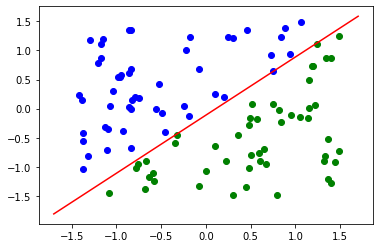

In [4]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

def generate_dataset(k0, k1):
    f1=0
    f2=0
    sz=(k0+k1)*2
    store=np.random.uniform(-1.5,1.5,(sz,2))
    x = np.linspace(-1.7,1.7,50)
    y= (9*x-1)/9
    p=[]
    Y=[]

    for i in range(len(store)):
            if f1<k0:
                if (9*store[i,0]-1)/9 < store[i,1]:
                    plt.scatter(store[i,0],store[i,1],c='b')
                    p.append([store[i,0],store[i,1]])
                    Y.append(-1)
                    f1+=1
            if f2<k1:
                if (9*store[i,0]-1)/9 > store[i,1]:
                    plt.scatter(store[i,0],store[i,1],c='g')
                    p.append([store[i,0],store[i,1]])
                    Y.append(1)
                    f2+=1

    plt.plot(x, y, '-r')
    Y=np.asarray(Y).transpose().reshape(len(Y),1)
    X=np.asarray(p)
    
    return X,Y

X,Y=generate_dataset(50,50)
plt.show()

### Problem 2

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



X: (100, 2)
Y: (100, 1)
Final weight vector:
 [[ 12.75312837 -12.2748115   -2.        ]]


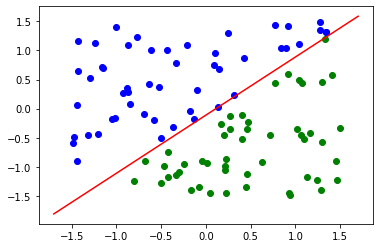

In [5]:
def fit_line(X, y):
    X=np.c_[X,np.ones((100,1))]
    X=np.asmatrix(X)
    w=np.asmatrix(np.ones((len(np.transpose(X)),1)))
    selector=np.asarray(random.sample(range(0, 100), 100))
    i=0

    while i<len(selector):
        row=selector[i]
        ans=np.matmul(X[row],w)
        if ans<0:
            v=-1
        else:
            v=1
        if (v == Y[row]):
            i+=1
        else:
            z=Y[row].item()*(np.transpose(X[row]))
            w=w+z
            i=0
    return w.transpose()
    
X,Y=generate_dataset(50,50)

print("X:",X.shape)
print("Y:",Y.shape)

weight_vector=fit_line(X,Y)
print("Final weight vector:\n",weight_vector)